In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import StringIO
import lib

In [3]:
zip_filename = lib.download_file('http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv', to='temp')
csv_filename = lib.extract_csv_from_zip(zip_filename, in_dir='temp')
data         = lib.read_csv_pandas(csv_filename, ignore_lines = 3)

(1) Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA.

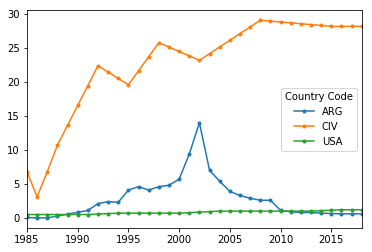

In [4]:
dd = lib.filter_country_code(data, 'ARG', 'CIV', 'USA')
dd = lib.normalize(dd)
lib.plot(dd)

(2) Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

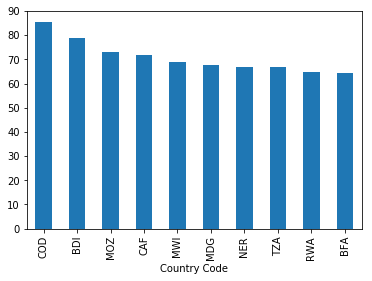

In [5]:
# I have chosen to use the mean poverty rate, instead of the poverty for a single year

df = data
df.index = lib.get_country_codes(df)
df = lib.get_years_data(df).transpose()
means = df.mean(numeric_only = True).dropna().sort_values(ascending = False)
means.loc[means.index[0:10]].plot.bar()

(3) Show the development of absolute poverty in all the central american countries.

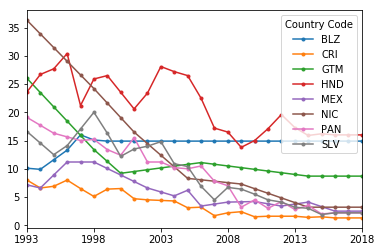

In [6]:
# https://en.wikipedia.org/wiki/United_Nations_geoscheme_for_the_Americas

dd = lib.filter_country_code(data, 'BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'MEX', 'NIC', 'PAN')
dd = lib.normalize(dd)
lib.plot(dd)

(4) From the worldbank api, find one more interesting question you would like to ask.

How does the total GDP of all countries progress per year.

In [28]:
zip_filename = lib.download_file('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv', to='temp')
csv_filename = lib.extract_csv_from_zip(zip_filename, in_dir='temp')
gdp_data     = lib.read_csv_pandas(csv_filename, ignore_lines = 3)
gdp_data.index = gdp_data['Country Code']
gpd_data = gdp_data.interpolate()
gdp_data_2009 = gdp_data['2009']
gdp_data_2007 = gdp_data['2008']

# ((gdp_data_2007 - gdp_data_2009) / gdp_data_2007 * 100).sort_values(ascending= False)

lib.get_years_data(gpd_data).sum()

1960    2.329396e+13
1961    2.412109e+13
1962    2.597599e+13
1963    2.805468e+13
1964    3.077216e+13
1965    2.735923e+13
1966    2.951474e+13
1967    2.964502e+13
1968    3.181536e+13
1969    3.509096e+13
1970    3.935714e+13
1971    4.351157e+13
1972    5.021033e+13
1973    6.185417e+13
1974    7.199216e+13
1975    7.466667e+13
1976    8.083514e+13
1977    8.929618e+13
1978    1.044964e+14
1979    1.125485e+14
1980    1.253444e+14
1981    1.244483e+14
1982    1.051893e+14
1983    1.047227e+14
1984    1.065598e+14
1985    1.113572e+14
1986    1.310745e+14
1987    1.465053e+14
1988    1.631499e+14
1989    1.670010e+14
1990    1.811180e+14
1991    1.895524e+14
1992    1.963576e+14
1993    1.987769e+14
1994    2.132795e+14
1995    2.356522e+14
1996    2.428547e+14
1997    2.424336e+14
1998    2.411463e+14
1999    2.473355e+14
2000    2.486868e+14
2001    2.611861e+14
2002    2.720612e+14
2003    3.072801e+14
2004    3.487293e+14
2005    3.812188e+14
2006    4.177275e+14
2007    4.777